# 5. 数据可视化

本章介绍的是matplotlib库的基本可视化功能。对标准的绘图工作，它很容易理解，进行复杂的绘图和自定义时，它又很灵活。

## 5.1 二维绘图

首先，必须导入对应的库，主要的绘图函数在子库matplotlib.pyplot中：

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 7.1.1 一维数据集

生成20个标准正态分布随机数，保存在Numpy ndarray中：

In [2]:
np.random.seed(2000)
y = np.random.standard_normal(20)

pyplot子库中的plot函数是最基础的绘图函数，原则上需要两组数值, 且两组值的数量必须相等

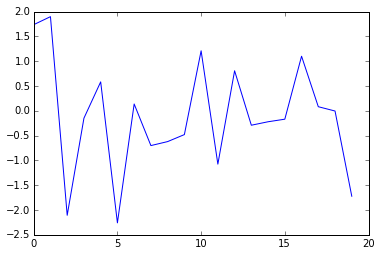

In [3]:
x = range(len(y))
plt.plot(x, y)

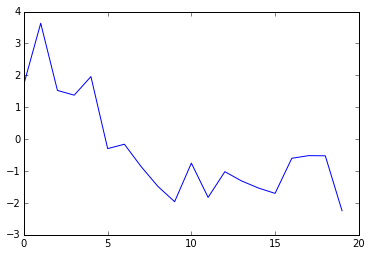

In [4]:
plt.plot(y.cumsum())

默认图标不满足要求，希望可以自定义字体，在坐标轴上有标签，绘制网格等。

(0.0, 19.0, -2.2445808982336373, 3.6346515174631651)

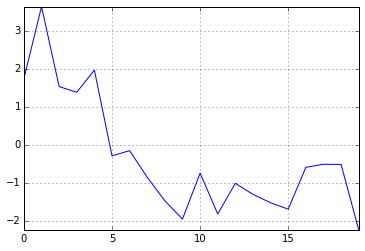

In [5]:
plt.plot(y.cumsum())
plt.grid(True)
plt.axis('tight')

(-3.2445808982336373, 4.6346515174631655)

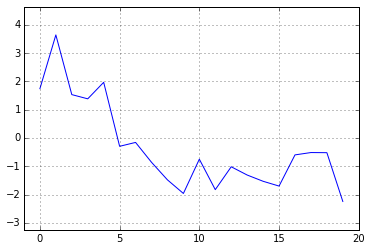

In [6]:
plt.plot(y.cumsum())
plt.grid(True)
plt.xlim(-1, 20)
plt.ylim(np.min(y.cumsum()) - 1 , np.max(y.cumsum())  + 1)

描述x, y值性质的标题和标签分别通过plt.title, plt.xlabel, plt.ylabel添加

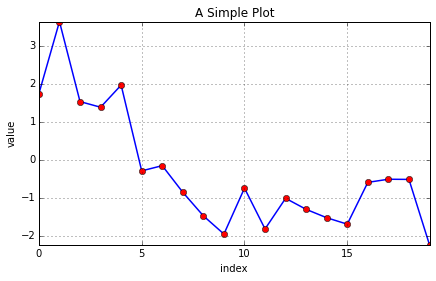

In [7]:
plt.figure(figsize=(7, 4))
plt.plot(y.cumsum(), 'b', lw=1.5)
plt.plot(y.cumsum(), 'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

### 5.1.2 二维数据集

首先，生成一个二维样本数据集，下面的代码生成包含正态标准分布随机数的20*2 Numpy ndarray。

In [8]:
np.random.seed(2000)
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

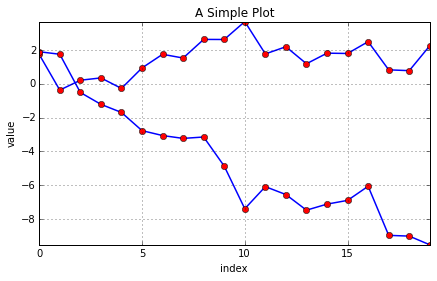

In [9]:
plt.figure(figsize=(7, 4))
plt.plot(y, 'b', lw=1.5)
plt.plot(y, 'ro')
plt.grid(True)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

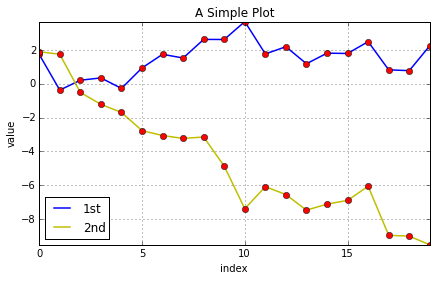

In [10]:
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 1], 'y', lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0) # 接受不同的位置参数
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

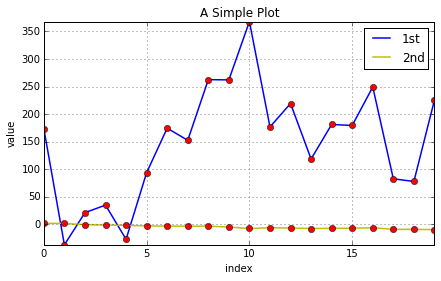

In [11]:
y[:, 0] = y[:, 0] * 100
plt.figure(figsize=(7, 4))
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 1], 'y', lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')

第一个数据集仍然是易于分辨的，而第二个数据集在新的Y刻度上看起来像一条直线。

解决这个问题的方法：

1. 使用2个y轴；
2. 使用两个子图（上下，左右）

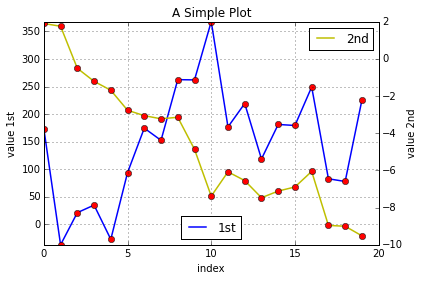

In [12]:
fig, ax1 = plt.subplots()
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=8)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
ax2 = ax1.twinx()
plt.plot(y[:, 1], 'y', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')

fig, ax1 = plt.subplots() # plot first data set using first axis
ax2 = ax1.twinx() # plot second data set using second axis
通过使用plt.subplots函数，可直接访问底层绘图对象。例如可以用它生成和第一个图共享x轴的第二个子图。

接下来考虑两个单独的子图的情况

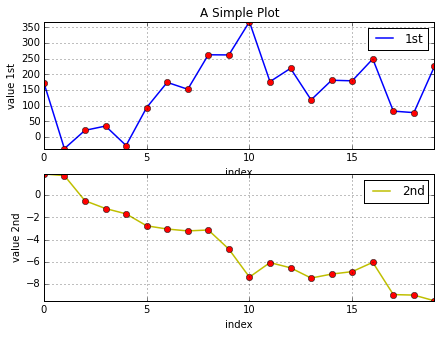

In [13]:
plt.figure(figsize=(7, 5))
plt.subplot(211)
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
plt.subplot(212)
plt.plot(y[:, 1], 'y', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 2nd')

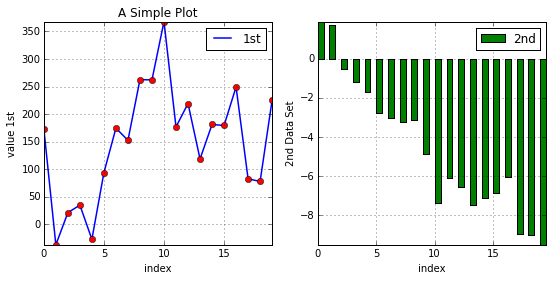

In [14]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Plot')
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5, color='g', label='2nd')
plt.grid(True)
plt.legend(loc=0)
plt.axis('tight')
plt.xlabel('index')
plt.ylabel('2nd Data Set')

### 其他绘图样式

对于二维图，线图和点图是金融学中最重要的。因为很多数据集用于表示时间序列数据，此类数据通常可以由这些图标进行可视化。

现在坚持使用二维数据集并说明一些对金融应用程序有用的替代可视化方法。

第一种就是散点图，这种图标中一个数据集的值作为其他数据集的x值。

In [15]:
y = np.random.standard_normal((1000, 2))

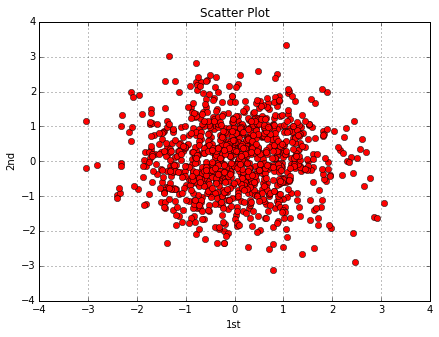

In [16]:
plt.figure(figsize=(7, 5))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

matplotlib还提供了生成散点图的特殊函数scatter。

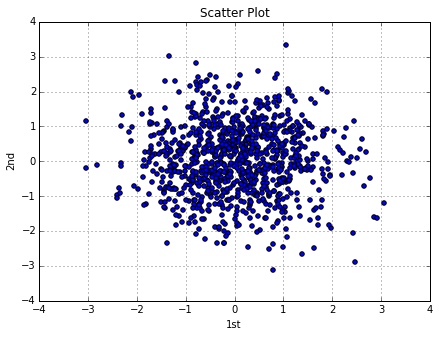

In [17]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

scatter函数绘图还可以加入第三维，通过不同的颜色进行可视化，并使用彩条加以描述。

In [18]:
c = np.random.randint(0, 10, len(y))

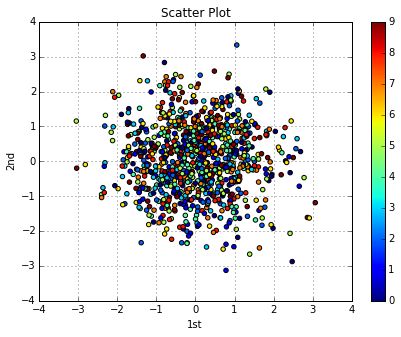

In [19]:
plt.figure(figsize=(7, 5))
plt.scatter(y[:, 0], y[:, 1],c=c, marker='o')
plt.colorbar()
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

另一种图标类型*直方图*也常常用于金融收益中。

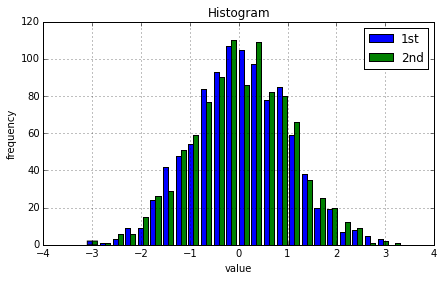

In [20]:
plt.figure(figsize=(7, 4))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

两个数据集的数据在直方图中叠加

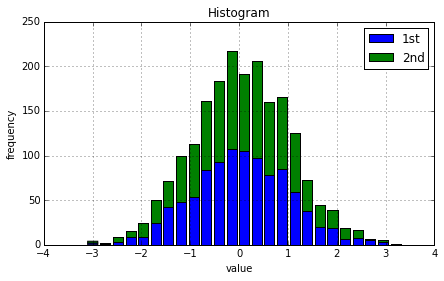

In [21]:
plt.figure(figsize=(7, 4))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'], stacked=True, bins=25) # stacked = true 数据叠加
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')

另一个实用的图形是*箱体图*，箱体图可以简洁地概述数据集的特性，很容易比较多个数据集。

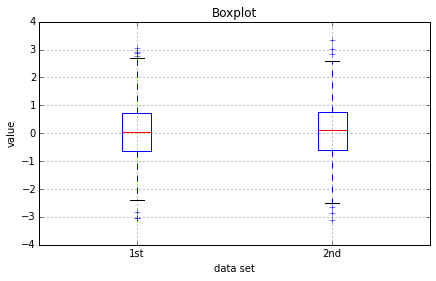

In [22]:
fig, ax = plt.subplots(figsize=(7,4))
plt.boxplot(y)
plt.grid(True)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')

绘制一个函数的图像，并以图形的方式说明了某个上限和下限之间函数图像下方区域的面积，换言之，从函数下限到上限之间的函数积分值。下列的图标说明，matplotlib能无缝地处理Latex字体设置。

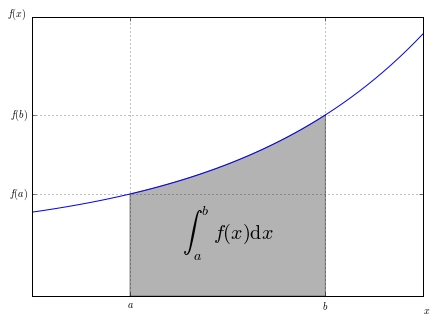

In [23]:
from matplotlib.patches import Polygon
def func(x):
    return 0.5 * np.exp(x) + 1

a, b = 0.5, 1.5 #intergral limits
x = np.linspace(0, 2)
y = func(x)

fig, ax = plt.subplots(figsize=(7,5))
plt.plot(x, y, 'b')
plt.ylim(ymin=0)

# Illustrate the integral value, i.e. the area under the function
# between the lower and upper limits
Ix = np.linspace(a, b)
Iy = func(Ix)
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 1, r"$\int_a^b f(x)\mathrm{d}x$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.grid(True)

## 5.2 金融学图表

matplotlib还提供了少数精选的特殊金融图标。这些图标主要用于可视化历史股价数据或类似的金融时间序列数据。可以在matplotliab.finance子库中找到：

In [32]:
import matplotlib.finance as mpf
import tushare as ts
import datetime

In [52]:
start = '2016-07-19'
end = '2017-07-19'
ticker = '600570' # 恒生电子最近一年的数据
quotes = ts.get_hist_data(ticker, start, end)

In [53]:
quotes.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2017-07-19,38.43,39.45,39.41,38.05,130425.90,0.66,1.70,40.614,42.315,43.793,170996.55,165492.13,193802.84,2.11
2017-07-18,38.38,39.38,38.75,37.15,157990.92,0.29,0.75,41.352,42.931,44.066,175851.78,170832.98,200131.43,2.56
2017-07-17,41.98,41.98,38.46,38.46,347475.22,-4.27,-9.99,42.326,43.598,44.339,169714.16,178872.91,200684.86,5.62
2017-07-14,43.72,43.72,42.73,42.62,99459.89,-0.99,-2.26,43.350,44.440,44.616,135134.49,161291.16,190866.24,1.61
2017-07-13,43.09,43.88,43.72,42.70,119630.80,0.62,1.44,43.758,44.835,44.680,148183.05,169355.21,194769.72,1.94


In [93]:
import pandas as pd
import time
quotes.index = pd.to_datetime(quotes.index)
quotes.info()
quotes.head()
stock_array  = np.array(quotes.reset_index()[['date','open','high','low','close']])

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 2017-07-19 to 2016-07-19
Data columns (total 14 columns):
open            242 non-null float64
high            242 non-null float64
close           242 non-null float64
low             242 non-null float64
volume          242 non-null float64
price_change    242 non-null float64
p_change        242 non-null float64
ma5             242 non-null float64
ma10            242 non-null float64
ma20            242 non-null float64
v_ma5           242 non-null float64
v_ma10          242 non-null float64
v_ma20          242 non-null float64
turnover        242 non-null float64
dtypes: float64(14)
memory usage: 28.4 KB


In [94]:
from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import DateFormatter, WeekdayLocator, DayLocator, MONDAY, date2num

def pandas_candlestick_ohlc(stock_data, otherseries=None):    
 
    # 设置绘图参数，主要是坐标轴 
    mondays = WeekdayLocator(MONDAY) 
    alldays = DayLocator()   
    dayFormatter = DateFormatter('%d')
 
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if stock_data.index[-1] - stock_data.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
    ax.grid(True)
 
    # 创建K线图   
    stock_array = np.array(stock_data.reset_index()[['date','open','high','low','close']])
    stock_array[:,0] = date2num(stock_array[:,0])
    candlestick_ohlc(ax, stock_array, colorup = "red", colordown="green", width=0.4)
 
 
    # 可同时绘制其他折线图
    if otherseries is not None:
        for each in otherseries:
            plt.plot(stock_data[each], label=each)            
        plt.legend()
 
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

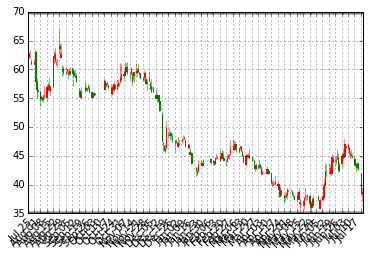

In [95]:
pandas_candlestick_ohlc(quotes)

## 5.3 3D绘图

金融从3维可视化中获益的领域不是太多。但，波动平面是一个应用领域，它可同时展示许多到期日和行权价的隐含波动率。

我们考虑如下因素：

1. 行权价在50~150元之间；
2. 到期日在0.5~2.5年之间。

这为我们提供一个2维坐标系，我们可以使用NumPy的meshgrid函数，根据两个1维ndarray对象生成这样的坐标系：

In [96]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)

In [97]:
strike[:2]

array([[  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.47826087,   97.82608696,
         102.17391304,  106.52173913,  110.86956522,  115.2173913 ,
         119.56521739,  123.91304348,  128.26086957,  132.60869565,
         136.95652174,  141.30434783,  145.65217391,  150.        ],
       [  50.        ,   54.34782609,   58.69565217,   63.04347826,
          67.39130435,   71.73913043,   76.08695652,   80.43478261,
          84.7826087 ,   89.13043478,   93.47826087,   97.82608696,
         102.17391304,  106.52173913,  110.86956522,  115.2173913 ,
         119.56521739,  123.91304348,  128.26086957,  132.60869565,
         136.95652174,  141.30434783,  145.65217391,  150.        ]])

In [98]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm 

In [99]:
from mpl_toolkits.mplot3d import Axes3D

<matplotlib.colorbar.Colorbar instance at 0x0ED5CB48>

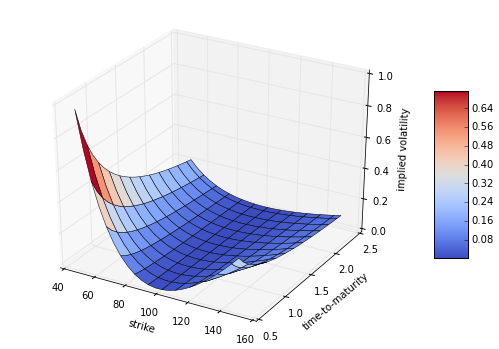

In [100]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

fig.colorbar(surf, shrink=0.5, aspect=5)

和2维图表一样，线样式可以由单个点或下列中的单个三角形表示

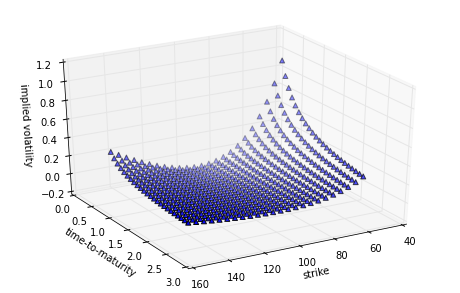

In [101]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)

ax.scatter(strike, ttm, iv, zdir='z', s=25, c='b', marker='^')

ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')

## 5.4 结语

matplotlib是Python数据可视化的基准和主力，它与NumPy紧密集成，基本功能可以轻松而方便访问。但，另方面，matplotlib是相当强大的库，具有复杂的API，在本章无法广泛地概述matplotlib的所有功能